In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm

## Data Cleaning 

In [3]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Dataset/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Let's change date
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
# Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Good! Seems data is cleaned already !

Let's check the correlation with 'price'

In [8]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

We first determine the relationship between prices and different variables. We find that sqft_living, grade, sqft_above, sqft_living 15 and bathrooms are more corrlated with the price

In [9]:
results = ols("price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + bedrooms + lat + waterfront + floors + yr_renovated + sqft_lot + sqft_lot15 + yr_built + condition + long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:26:51   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.686e+07    1.6e+06    -23.105

P>|t| > 0.05 means that there are signficane difference between those variables. 

R-squared equal to 0.695 means that this modle could explain 65% of the variance by the date. 


Intercept is negative means even when all the predictor variables (independent variables) have values of zero, the predicted value of the response variable (dependent variable) still has a negative offset. 

let's use other regression model to test further late.

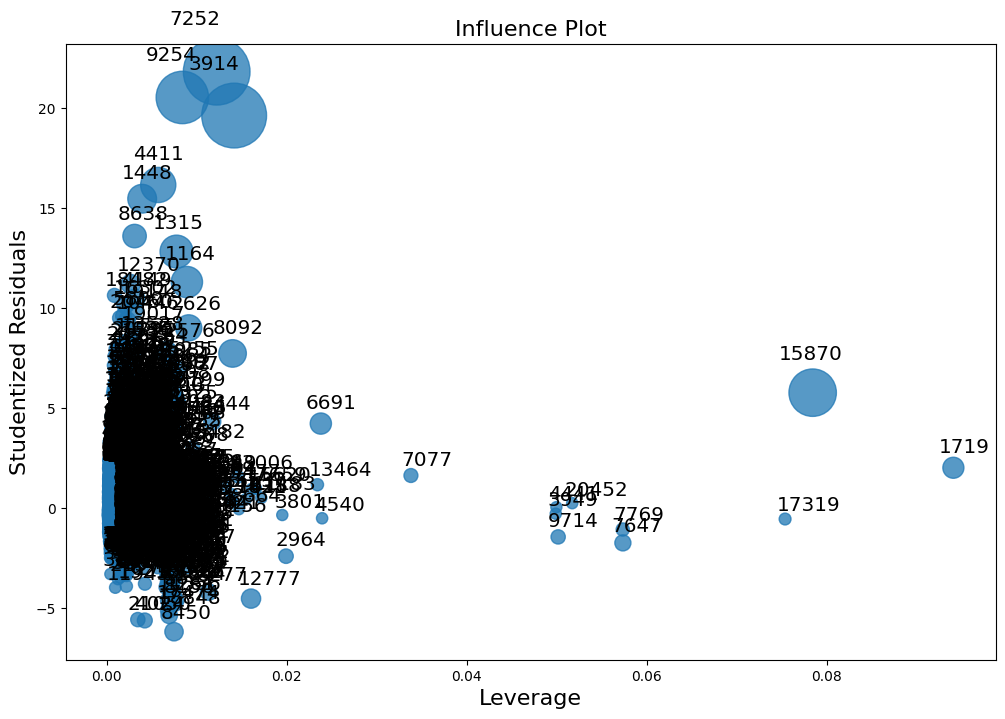

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

Since the the outlier is not too much, I dicided to ignore them because I think ridge regression could handle this perfectly. 

In [11]:
# separate features and target.   Date and ID seems not useful here. 
categorical_features = ['zipcode']
numerical_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 
                      'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
                     'condition', 'long']
target = ['price']

## Model Design

I think the zipcode is the only categorical here. Since other variables are continous and numerical.

In [12]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [13]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [14]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [15]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [16]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15', 'bathrooms',
                                                   'view', 'sqft_basement',
                                                   'bedrooms', 'lat',
                                                   'waterfront', 'floors',
                                                   'yr_renovated', 'sqft_lot',
                                                   'sqft_lot15', 'yr_built',
                                                   'condition', 'long'])])),
                ('regressor', LinearRegression())])

In [17]:
pred = linear_regression.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(pred,y_test))

157045.16228631814

The linear regression model indicates that the root mean square error (RMSE) is equal to 157,045. This means that the predictions made by the model have an average difference of 157,045 when compared to the actual data.

In [19]:
# let's try ridge_regression
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.5))
])

In [20]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15', 'bathrooms',
                                                   'view', 'sqft_basement',
                                                   'bedrooms', 'lat',
                                                   'waterfront', 'floors',
                                                   'yr_renovated', 'sqft_lot',
                                                   'sqft_lot15', 'yr_built',
                                                   'condition', 'long'])])),
                ('regressor', Ridge(alpha=0.5))])

In [21]:
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge,y_test))

157069.62309492828

The Redge regression model indicates that the root mean square error (RMSE) is equal to 157,069. This means that the predictions made by the model have an average difference of 157,069 when compared to the actual data.

In [22]:
# lasso regression
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [23]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12386605948221.562, tolerance: 207065660607.36664
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15', 'bathrooms',
                                                   'view', 'sqft_basement',
                                                   'bedrooms', 'lat',
                                                   'waterfront', 'floors',
                                                   'yr_renovated', 'sqft_lot',
                                                   'sqft_lot15', 'yr_built',
                                                   'condition', 'long'])])),
                ('regressor', Lasso())])

In [24]:
lasso_pred = lasso_regression.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

157046.88335353928

The lasso regression model indicates that the root mean square error (RMSE) is equal to 157,046. This means that the predictions made by the model have an average difference of 157,046 when compared to the actual data.

In [26]:
# elasticnet_rergression
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [27]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15', 'bathrooms',
                                                   'view', 'sqft_basement',
                                                   'bedrooms', 'lat',
                                                   'waterfront', 'floors',
                                                   'yr_renovated', 'sqft_lot',
                                                   'sqft_lot15', 'yr_built',
                                                   'condition', 'long'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [28]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

196002.75092381192

## Model Choosing

Based on those analysis, elasticnent seems worst in all model since it's RMSE equal to 196002. Liner regression seems better here. 


However, The ridge handles outliers better than other models and those models RMSE look similar,
 , I chose ridge regression to avoid the impact of outliers on the overall performence.
 

In [30]:
model_interpret = Ridge(alpha=0.6)

# Fit model to the original data (before one-hot encoding)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(df[numerical_features]
                                                    ,df[target], test_size=0.3, random_state=1234)
X_train_orig_scaled = num_transformer.fit_transform(X_train_orig[numerical_features])
model_interpret.fit(X_train_orig_scaled, y_train_orig)


Ridge(alpha=0.6)

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
# Get feature importances
coef_array = model_interpret.coef_.reshape(-1)
pd.Series(coef_array, index=numerical_features).sort_values(ascending=False)

grade            114411.709510
sqft_living       81172.509911
lat               77761.980886
sqft_above        75586.093680
waterfront        51035.495502
view              37403.632007
bathrooms         31397.493102
sqft_basement     27284.959072
sqft_living15     22439.310835
condition         21128.226143
yr_renovated       9778.584643
sqft_lot           3437.836932
floors             1927.570918
sqft_lot15       -11795.015043
long             -16726.858961
bedrooms         -32274.295792
yr_built         -72581.460982
dtype: float64

Grade: The quality of house can influence the price, sounds reasonable.

sqft_living: The larger the sqft_living, the highest price. Reasonable.

lat: different are may influence the price of hourse. Reasonable.

sqft_above: the Square feet above ground could influence the price. Reasonable. 

waterfront: the housr with waterfront should with higher price. Reasonable.

view: Good view influence the price. Reasonable.

bathrooms: much bathrooms influce more price. Maybe.

sqft_living15: This could influence the price also could be reasonable. 

Condition: better condition, better price. Reasonable. 

bedrooms: much bedrooms decrease the price, why?. Not reasonable. 

yr_built: The older the house, the cheaper the price. Reasonable.

Overall, I think the variable bedroom is not reasonable because more bedroom will decrease the price house is very strange. Other variables seem pretty good. 

The price of a house in king city is primarily affected by the house rating, with each level adding $114,411 to the price of the house. sqrt_living, lat, and sqft_above are also important factors in price increases. Secondly, yr_built have a great impact on the house price. 
However, each bedrooms increase will reduce the value of -$32,274 seems not logic. 
 